In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import sys
import os
sys.path.append(os.path.abspath('../common/'))
import common_functions as cf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, BayesianRidge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.svm import SVR

In [2]:
prediction_week = 30

In [3]:
weather_path = 'Input/weather_train_set0.csv'
demand_path = 'Input/demand_train_set0.csv'
solar_path = 'Input/pv_train_set0.csv'
dp = cf.DataPreprocesser(weather_path, demand_path, solar_path)
dp.load_df()
dp.remove_nan()
dp.interpolate_df()
dp.set_df(dp.df[dp.df['week']!=44])
dp.get_zenith_angle()
dp.df.head()

,demand_MW,irradiance_Wm-2,pv_power_mw,panel_temp_C,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,...,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,week,dow,hour,sp,zenith_angle
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-06 00:00:00,2.32,0.0,0.0,1.61,5.14,10.76,6.350,3.58,11.120,7.390,...,0.0,0.0,0.0,0.0,0.0,45,0,0,1.0,122.590257
2017-11-06 00:30:00,2.22,0.0,0.0,2.98,5.05,10.70,6.245,3.58,11.060,7.325,...,0.0,0.0,0.0,0.0,0.0,45,0,0,2.0,115.596177
2017-11-06 01:00:00,2.04,0.0,0.0,2.76,4.96,10.64,6.140,3.58,11.000,7.260,...,0.0,0.0,0.0,0.0,0.0,45,0,1,3.0,108.524339
2017-11-06 01:30:00,1.97,0.0,0.0,3.98,5.03,10.60,6.085,3.57,10.965,7.255,...,0.0,0.0,0.0,0.0,0.0,45,0,1,4.0,101.398356
2017-11-06 02:00:00,1.91,0.0,0.0,2.13,5.10,10.56,6.030,3.56,10.930,7.250,...,0.0,0.0,0.0,0.0,0.0,45,0,2,5.0,94.234878


In [4]:
weather_columns = dp.get_columns_of_group_names(['temp', 'solar'], [1,2])
weather_columns.append('sp')
X,y = dp.build_input_for_ml_algo(weather_columns, ['pv_power_mw'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2019)
ml_researcher = cf.MachineLearningResearcher(X_train,y_train)
with tqdm(total=len(ml_researcher.models), file=sys.stdout) as pbar:
    for model_name in ml_researcher.models:
        ml_researcher.get_best_scores_and_params_of_ml_algos(model_name)
        pbar.update()
print(ml_researcher.get_best_model_with_best_score())
print(ml_researcher.scores)
print(ml_researcher.get_best_model_with_best_score())
ml_researcher.display_ml_algo_scores()
# models_bests_scores_and_params = {}
# ml_researcher = MachineLearningResearcher
# ml_researcher.param_grids

  0%|          | 0/5 [00:04<?, ?it/s]


KeyboardInterrupt: 

In [12]:
ml_predictor = cf.MLPredictor(dp,prediction_week)
ml_predictor.get_demand_previous_week()
ml_predictor.get_weather_prediction(weather_path)
ml_predictor.predict_solar_power_from_weather(RandomForestRegressor(random_state=2019, n_estimators = 300))

/home/raph/project/westernpower/westernpower/task0/common_functions.py:296: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  demand_prediction['week']=demand_prediction.index.week


,demand_MW,week,dow,hour,sp,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,pv_power_mw
datetime,,,,,,,,,,,,,,,,,,
2018-07-23 00:00:00,1.73,30.0,0.0,0.0,1.0,15.670,18.500,17.050,17.860,18.740,16.740,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 00:30:00,1.62,30.0,0.0,0.0,2.0,15.570,18.355,16.845,17.585,18.630,16.620,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 01:00:00,1.56,30.0,0.0,1.0,3.0,15.470,18.210,16.640,17.310,18.520,16.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 01:30:00,1.48,30.0,0.0,1.0,4.0,15.370,18.110,16.485,17.050,18.455,16.410,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 02:00:00,1.48,30.0,0.0,2.0,5.0,15.270,18.010,16.330,16.790,18.390,16.320,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-29 21:30:00,2.40,30.0,6.0,21.0,44.0,15.485,17.415,16.370,16.285,17.625,16.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-29 22:00:00,2.15,30.0,6.0,22.0,45.0,15.310,17.390,16.300,16.030,17.580,16.040,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-29 22:30:00,1.93,30.0,6.0,22.0,46.0,15.215,17.380,16.255,15.835,17.570,15.980,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
bpd = cf.BatteryPowerDispatcher
B= bpd.get_all_dispatch_in_a_week(bpd,ml_predictor.predicted_df, prediction_week)
print(B.head())
print(B.sum())

   3000  3001  3002  3003  3004  3005  3006
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0
5   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3000    6.000000e-02
3001    2.000000e-02
3002    2.000000e-02
3003    2.000000e-02
3004    1.332268e-14
3005    7.000000e-02
3006    8.000000e-02
dtype: float64


In [14]:
B_final = bpd.format_dispatching_for_competition(B, ml_predictor.predicted_df.index)
B_final.to_csv('Output/test_raph/pred1.csv')

## With only demand prediction

In [8]:
predicted_solar_power = dp.df.loc[dp.df['week'] == (prediction_week-1), ['pv_power_mw']]
predicted_solar_power.index = predicted_solar_power.index + pd.DateOffset(7)
predicted_solar_power

,pv_power_mw
datetime,
2018-07-23 00:00:00,0.0
2018-07-23 00:30:00,0.0
2018-07-23 01:00:00,0.0
2018-07-23 01:30:00,0.0
2018-07-23 02:00:00,0.0
...,...
2018-07-29 21:30:00,0.0
2018-07-29 22:00:00,0.0
2018-07-29 22:30:00,0.0


In [26]:
weather_columns = dp.get_columns_of_group_names(['temp'], [1,2,5,6])
weather_columns.append('sp')
# weather_columns.append('dow')

In [27]:
X_train = dp.df.loc[(dp.df['week'] >= 25)&(dp.df['week'] <= 29),weather_columns].values
y_train = dp.df.loc[(dp.df['week'] >= 25)&(dp.df['week'] <= 29),'demand_MW'].values

In [28]:
predicted_df = ml_predictor.predicted_df
predicted_df['pv_power_mw'] = predicted_solar_power

In [29]:
model = RandomForestRegressor(random_state=2019, n_estimators=450)
model.fit(X_train, y_train)
predicted_df['demand_MW'] = model.predict(ml_predictor.predicted_df[weather_columns].values)

In [30]:
bpd = cf.BatteryPowerDispatcher
B= bpd.get_all_dispatch_in_a_week(bpd,predicted_df, prediction_week)
B

,3000,3001,3002,3003,3004,3005,3006
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.003687,0.012497,0.004397,0.006050,0.009041,0.000000,0.006098


In [31]:
B.sum()

3000    0.037156
3001    0.010644
3002    0.037689
3003    0.025556
3004    0.029489
3005    0.023178
3006    0.043356
dtype: float64

In [32]:
B_final = bpd.format_dispatching_for_competition(B, predicted_df.index)
B_final.to_csv('Output/test_raph/pred_demand.csv')

## With only demand and charge_method2

In [9]:
predicted_solar_power = dp.df.loc[dp.df['week'] == (prediction_week-1), ['pv_power_mw']]
predicted_solar_power.index = predicted_solar_power.index + pd.DateOffset(7)
predicted_solar_power

,pv_power_mw
datetime,
2018-07-23 00:00:00,0.0
2018-07-23 00:30:00,0.0
2018-07-23 01:00:00,0.0
2018-07-23 01:30:00,0.0
2018-07-23 02:00:00,0.0
...,...
2018-07-29 21:30:00,0.0
2018-07-29 22:00:00,0.0
2018-07-29 22:30:00,0.0


In [10]:
weather_columns = dp.get_columns_of_group_names(['temp'], [1,2,5,6])
weather_columns.append('sp')

In [11]:
X_train = dp.df.loc[(dp.df['week'] >= 25)&(dp.df['week'] <= 29),weather_columns].values
y_train = dp.df.loc[(dp.df['week'] >= 25)&(dp.df['week'] <= 29),'demand_MW'].values

In [12]:
predicted_df = ml_predictor.predicted_df
predicted_df['pv_power_mw'] = predicted_solar_power

In [13]:
model = RandomForestRegressor(random_state=2019, n_estimators=450)
model.fit(X_train, y_train)
predicted_df['demand_MW'] = model.predict(ml_predictor.predicted_df[weather_columns].values)

In [14]:
bpd = cf.BatteryPowerDispatcher
B= bpd.get_all_dispatch_in_a_week(bpd,predicted_df, prediction_week, charge_method=2)
B

,3000,3001,3002,3003,3004,3005,3006
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
B.sum()

3000    0.037156
3001    0.010644
3002    0.037689
3003    0.025556
3004    0.029489
3005    0.023178
3006    0.043356
dtype: float64

In [16]:
B_final = bpd.format_dispatching_for_competition(B, predicted_df.index)
B_final.to_csv('Output/test_raph/pred_demand_meth2.csv')

In [ ]:
for i in range(7):
    plt.plot(dp.df.loc[(dp.df['week'] == 29) & (dp.df['dow'] == i)& (dp.df['sp'] <= 31) , 'pv_power_mw'])
    plt.plot(dp)
dp.df.loc[dp.df['week'] == 29 && dp.df[''], 'pv_power_mw']

### Pred with pv_power_mw only 4 weeks before 

In [41]:
ml_predictor = cf.MLPredictor(dp,prediction_week)
ml_predictor.get_demand_previous_week()
ml_predictor.get_weather_prediction(weather_path)
predicted_data = ml_predictor.predicted_df
weather_columns = dp.get_columns_of_group_names(['solar'], [1,2,3,5,6])
weather_columns += dp.get_columns_of_group_names(['temp'], [1,2])
weather_columns.append('sp')
model = RandomForestRegressor(random_state=2019, n_estimators = 300)
X_train = dp.df.loc[(dp.df['week'] >= (prediction_week-5))&(dp.df['week'] <= (prediction_week-1)),weather_columns].values
y_train = dp.df.loc[(dp.df['week'] >= (prediction_week-5))&(dp.df['week'] <= (prediction_week-1)),'pv_power_mw'].values
model.fit(X_train, y_train)
predicted_data['pv_power_mw'] = model.predict(predicted_data[weather_columns].values)

/home/raph/project/westernpower/westernpower/task0/common_functions.py:296: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  demand_prediction['week']=demand_prediction.index.week


In [42]:
bpd = cf.BatteryPowerDispatcher
B= bpd.get_all_dispatch_in_a_week(bpd,predicted_data, prediction_week)

In [43]:
B.sum()

3000    6.000000e-02
3001    2.000000e-02
3002    2.000000e-02
3003    2.000000e-02
3004    1.287859e-14
3005    7.000000e-02
3006    8.000000e-02
dtype: float64

In [44]:
B_final = bpd.format_dispatching_for_competition(B, predicted_df.index)
B_final.to_csv('Output/test_raph/pred_pv2.csv')

In [40]:
[1,2]+[2,6]

[1, 2, 2, 6]

### Pred with pv_power_mw and demand with only 4 weeks before

In [20]:
ml_predictor = cf.MLPredictor(dp,prediction_week)
ml_predictor.get_demand_previous_week()
ml_predictor.get_weather_prediction(weather_path)
predicted_data = ml_predictor.predicted_df
weather_columns_pv = dp.get_columns_of_group_names(['solar'], [1,2,3,5,6])
weather_columns_pv += dp.get_columns_of_group_names(['temp'], [1,2])
weather_columns_pv.append('sp')
model_pv = RandomForestRegressor(random_state=2019, n_estimators = 300)
X_train_pv = dp.df.loc[(dp.df['week'] >= (prediction_week-5))&(dp.df['week'] <= (prediction_week-1)),weather_columns_pv].values
y_train_pv = dp.df.loc[(dp.df['week'] >= (prediction_week-5))&(dp.df['week'] <= (prediction_week-1)),'pv_power_mw'].values
model_pv.fit(X_train_pv, y_train_pv)
predicted_data['pv_power_mw'] = model_pv.predict(predicted_data[weather_columns_pv].values)
weather_columns_demand = dp.get_columns_of_group_names(['temp'], [1,2,5,6])
weather_columns_demand.append('sp')
# weather_columns_demand.append('dow')
model_demand = RandomForestRegressor(random_state=2019, n_estimators = 450)
X_train_demand = dp.df.loc[(dp.df['week'] >= (prediction_week-5))&(dp.df['week'] <= (prediction_week-1)),weather_columns_demand].values
y_train_demand = dp.df.loc[(dp.df['week'] >= (prediction_week-5))&(dp.df['week'] <= (prediction_week-1)),'demand_MW'].values
model_demand.fit(X_train_demand, y_train_demand)
predicted_data['demand_MW'] = model_demand.predict(predicted_data[weather_columns_demand].values)

/home/raph/project/westernpower/westernpower/task0/common_functions.py:295: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  self.predicted_df['week']=self.predicted_df.index.week


In [17]:
bpd = cf.BatteryPowerDispatcher
B= bpd.get_all_dispatch_in_a_week(bpd,predicted_data, prediction_week)

In [18]:
B.sum()

3000    0.010867
3001    0.106911
3002    0.104244
3003    0.106822
3004    0.081000
3005    0.007933
3006    0.056644
dtype: float64

In [19]:
B_final = bpd.format_dispatching_for_competition(B, predicted_data.index)
B_final.to_csv('Output/test_raph/pred_pv_and_demand.csv')

In [ ]:
ml_predictor = cf.MLPredictor(dp,prediction_week)
ml_predictor.get_demand_previous_week()
ml_predictor.get_weather_prediction(weather_path)
predicted_data = ml_predictor.predicted_df
weather_columns_pv = dp.get_columns_of_group_names(['solar'], [1,2,3,5,6])
weather_columns_pv += dp.get_columns_of_group_names(['temp'], [1,2])
weather_columns_pv.append('sp')
model_pv = RandomForestRegressor(random_state=2019, n_estimators = 300)
X_train_pv = dp.df.loc[(dp.df['week'] >= (prediction_week-5))&(dp.df['week'] <= (prediction_week-1)),weather_columns_pv].values
y_train_pv = dp.df.loc[(dp.df['week'] >= (prediction_week-5))&(dp.df['week'] <= (prediction_week-1)),'pv_power_mw'].values
model_pv.fit(X_train_pv, y_train_pv)
predicted_data['pv_power_mw'] = model.predict(predicted_data[weather_columns_pv].values)
weather_columns_demand = dp.get_columns_of_group_names(['temp'], [1,2,5,6])
weather_columns_demand.append('sp')
weather_columns_demand.append('dow')
model_demand = RandomForestRegressor(random_state=2019, n_estimators = 450)
X_train_demand = dp.df.loc[(dp.df['week'] >= (prediction_week-5))&(dp.df['week'] <= (prediction_week-1)),weather_columns_demand].values
y_train_demand = dp.df.loc[(dp.df['week'] >= (prediction_week-5))&(dp.df['week'] <= (prediction_week-1)),'demand_MW'].values
model_demand.fit(X_train_demand, y_train_demand)
predicted_data['demand_MW'] = model_demand.predict(predicted_data[weather_columns_demand].values)

In [4]:
weather_columns_pv = dp.get_columns_of_group_names(['solar'], [1,2,3,5,6])
weather_columns_pv += dp.get_columns_of_group_names(['temp'], [1,2])
weather_columns_pv.append('sp')
weather_columns_pv.append('zenith_angle')
ml_predictor = cf.MLPredictor(dp,prediction_week)
ml_predictor.get_demand_previous_week()
ml_predictor.get_weather_prediction(weather_path)
ml_predictor.predict_solar_power_weeks_before(RandomForestRegressor(random_state=2019, n_estimators = 300), weather_cols=weather_columns_pv)
ml_predictor.predict_demand_from_past_and_weather(RandomForestRegressor(random_state=2019, n_estimators = 450))

/home/raph/project/westernpower/westernpower/task0/common_functions.py:301: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  self.predicted_df['week']=self.predicted_df.index.week


,week,dow,sp,hour,zenith_angle,demand_MW,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,pv_power_mw
datetime,,,,,,,,,,,,,,,,,,,
2018-07-23 00:00:00,30.0,0.0,1.0,0.0,129.964392,1.774022,15.670,18.500,17.050,17.860,18.740,16.740,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 00:30:00,30.0,0.0,2.0,0.0,123.037135,1.663511,15.570,18.355,16.845,17.585,18.630,16.620,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 01:00:00,30.0,0.0,3.0,1.0,116.048656,1.593067,15.470,18.210,16.640,17.310,18.520,16.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 01:30:00,30.0,0.0,4.0,1.0,109.024984,1.587467,15.370,18.110,16.485,17.050,18.455,16.410,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 02:00:00,30.0,0.0,5.0,2.0,101.985047,1.583000,15.270,18.010,16.330,16.790,18.390,16.320,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-29 21:30:00,30.0,6.0,44.0,21.0,161.775904,2.453022,15.485,17.415,16.370,16.285,17.625,16.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-29 22:00:00,30.0,6.0,45.0,22.0,156.625250,2.221022,15.310,17.390,16.300,16.030,17.580,16.040,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-29 22:30:00,30.0,6.0,46.0,22.0,150.539409,1.994644,15.215,17.380,16.255,15.835,17.570,15.980,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='datetime'>

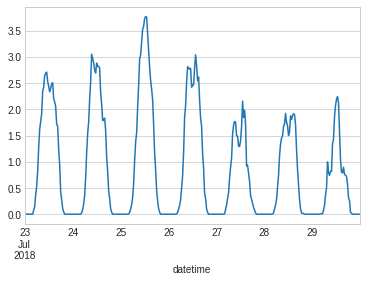

In [5]:
ml_predictor.predicted_df['pv_power_mw'].plot()

<AxesSubplot:xlabel='datetime'>

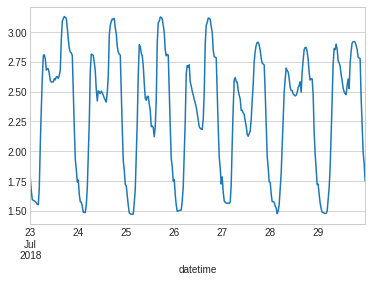

In [6]:
ml_predictor.predicted_df['demand_MW'].plot()

In [7]:
bpd = cf.BatteryPowerDispatcher
B= bpd.get_all_dispatch_in_a_week(bpd,ml_predictor.predicted_df, prediction_week)

In [8]:
B_final = bpd.format_dispatching_for_competition(B, ml_predictor.predicted_df.index)
B_final.to_csv('Output/test_raph/pred_pv_and_demand2.csv')